# The Quantum Game
## Chapter 2 - Playing the Game: Quantum Physics in 1 Dimension
### Section 1 - The Infintie Square Well
Landon Buell

4 August 2020

In [1]:
        #### IMPORTS ####
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Define the necessary constants, and create functions to help up build the hamiltonian matrix numerically

In [68]:
        #### Define Constants ####
    
hbar,m = 1,1
Npts = 4096
xLow,xHigh = -4,+6
xAxis = np.linspace(xLow,xHigh,Npts)
dx = xAxis[1] - xAxis[0]

        #### Define Operatators ####

def KineticEnergyMatrix(N,dx,hbar,m):
    """ Represent Quantum Kinetic Energy as an (N x N) Matrix """
    mainDiagonal = np.diag(np.ones(N),0) * -2
    upperDiagonal = np.diag(np.ones(N-1),-1)
    lowerDiagonal = np.diag(np.ones(N-1),+1)
    D2 = (1/dx**2) * (upperDiagonal + mainDiagonal + lowerDiagonal)
    Tx = -((hbar**2)/(2*m))*D2
    return Tx

def PotentialEnergyMatrix (V):
    """ Represent Potential Function Operator as an (N x N) Matrix"""
    Vx = np.diag(V,0)
    return Vx

def HamiltonianMatrix(T,V):
    """ Add Kenetic + Potential Energy to Create Hamiltonian Matrix """
    return T + V


#### Create a function to help visualize a the potential and energy-eigen states 

In [78]:
def PlotPotential (x,V):
    """ Visualize Potential Function """
    plt.figure(figsize=(16,8))
    plt.title("The Infinite Square Well Potential",size=40,weight='bold')
    plt.xlabel("Space",size=30,weight='bold')
    plt.ylabel("Amplitde/Energy",size=30,weight='bold')
    
    plt.plot(x,V,color='red',label='Potential Function')
             
    plt.xticks(np.arange(-10,+12,2))
    plt.hlines(0,-4,+6,color='black')
    plt.vlines(0,0,1e100+1e99,color='black')
    
    plt.legend()
    plt.tight_layout()
    plt.grid()
    plt.show()
            
def PlotStates (x,states):
    """ Visualize Energy Eigen States """
    plt.figure(figsize=(16,8))
    plt.title("The Infinite Square Well Energy Eigen-States",size=40,weight='bold')
    plt.xlabel("Space",size=30,weight='bold')
    plt.ylabel("Amplitde/Energy",size=30,weight='bold')
    
    for i,psi in enumerate(states):
        plt.plot(x,psi,label="State "+str(i))
             
    plt.legend()
    plt.tight_layout()
    plt.grid()
    plt.show()     

### Create a function to produce the infinite square well potential

In [70]:
        #### Create ISW Potential Function ####
    
L = 2
leftWall = 0
rightWall = leftWall + L
    
def SquareWellPotential (left,right,xaxis,V):
    """ Represrnt ISW Potential Function as 1D Numpy Array """
    potentialFunction = np.array([0 if (x > left) and (x < right) else V for x in xaxis])
    return potentialFunction

Create the Infinite Square well potential, and visualize in 1D space. To "Simulate" an infintie potential function, we choose a VERY large floating-point number, such as $10^{100}$ instead of infinity. This prevents us from running into any serious numerical errors.

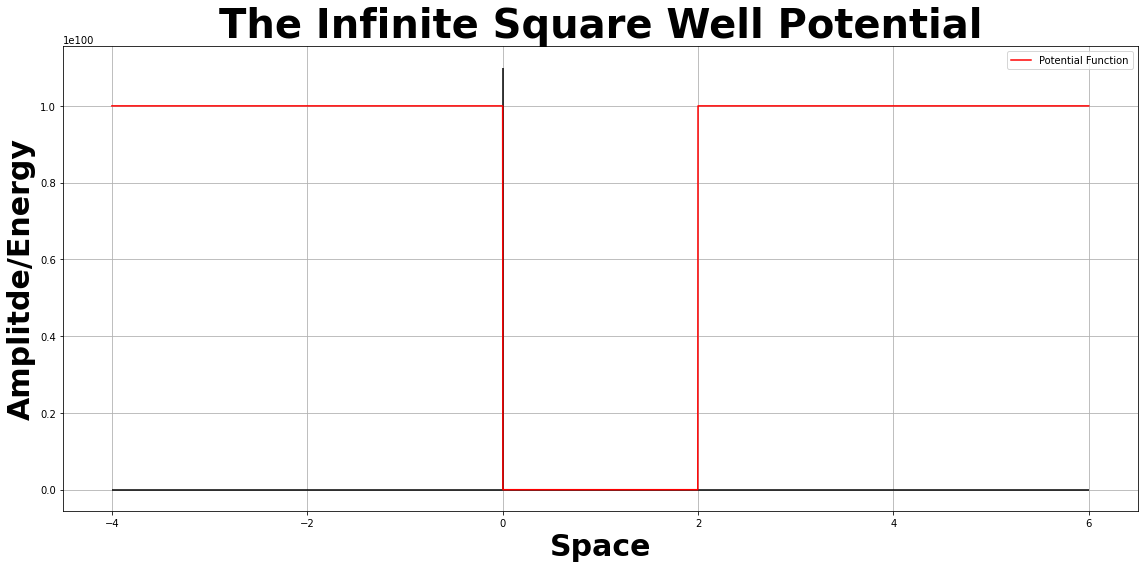

In [71]:
V = 1e100
potentialISW = SquareWellPotential(leftWall,rightWall,xAxis,V)

PlotPotential(xAxis,potentialISW)

#### Assemble the Operator matrices

The T,V,H matrices are each a 4096 x 4096 matrix!

#### Solve the Numerical Eigenvalue Problem for the Hamiltonian Matrix
The result is a N x N matrix of eigen-vectors, and a 1 x N matrix of eigen-values. The i-th column in the N x N matrix is the i-th energy eigen-state for this system. The i-th eigen-value is the corresponding energy for that state. Since we know the Hamiltonian to by a Hermitian matrix, we use a special variant of the EVP to solve it faster.

In [74]:
        #### Construct Hamiltonian Operator ####

kineticOperator = KineticEnergyMatrix(Npts,dx,1,1)
potentialOperator = PotentialEnergyMatrix(potentialISW)

hamiltonianOperator = HamiltonianMatrix(kineticOperator,potentialOperator)

        #### Solve Numerical EVP for Hamiltonian Matrix ###
    
eigenVals,eigenVecs = np.linalg.eigh(hamiltonianOperator)

#### Compare the numerical Solution to the known anlysitcal solution derived in this section

Extract the first 4 eigen-vector and eigen-values, and store them. Generate the equivalent known solutions and correspodning energy eigen values

In [76]:
        #### Generate Known Energy EigenStates ####
    
def EnergyEigenStatesISW(N,L,x):
    """ Generate the First 'N' Energy Eigen States """
    N = np.arange(N)
    A = np.sqrt(2/L)
    states = np.array([A*np.sin(n*np.pi*x/L) for n in N])
    return states

def EnergyEigenValuesISW(N,hbar,m,L):
    """ Generate the First 'N' Energy Eigen Values """
    N = np.arange(N)
    energies = np.array([(n**2*np.pi**2*hbar)/(2*m*L**2) for n in N])
    return energies
        

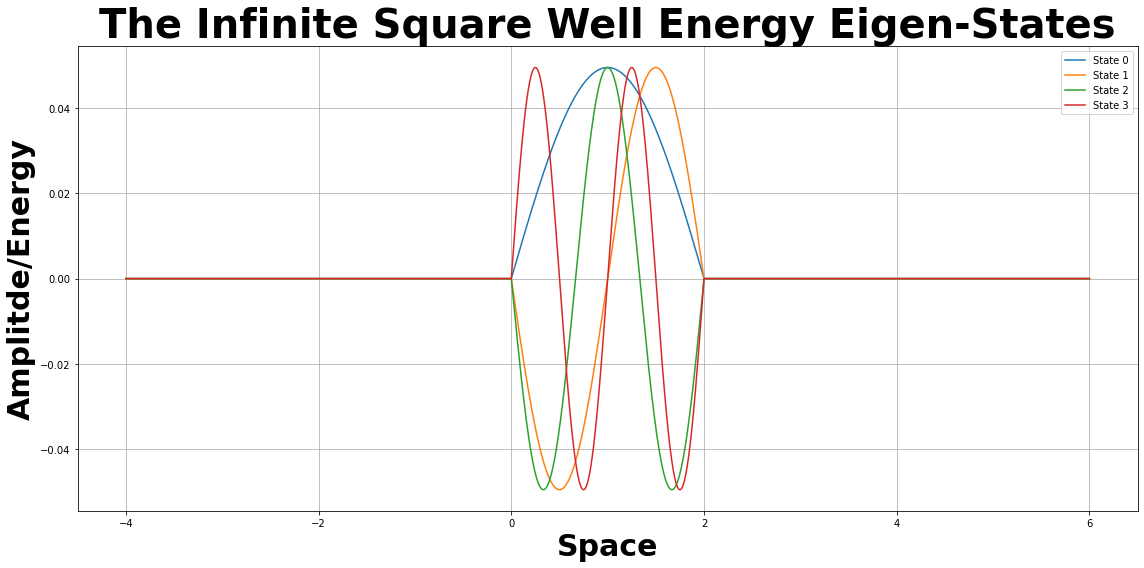

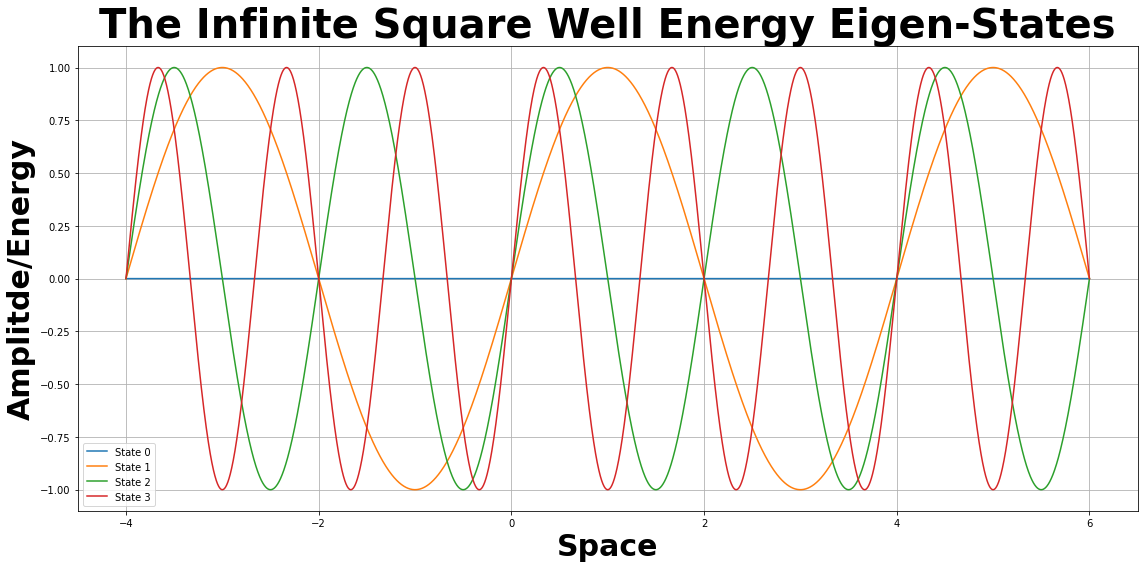

In [81]:
        #### Compute Energy Eigen Values ####
    
energyStates = EnergyEigenStatesISW(4,L,xAxis)
energyValues = EnergyEigenValuesISW(4,hbar,m,L)

PlotStates(xAxis,eigenVecs[:,:4].transpose())
PlotStates(xAxis,energyStates)
